In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel("D:\\Restart\\coffee_Sales\\Coffe_sales.xlsx")
print(df.head())
print(df.tail())
print(df.info())

        date                datetime  hour_of_day cash_type  \
0 2024-03-01 2024-03-01 10:15:50.520           10      card   
1 2024-03-01 2024-03-01 12:19:22.539           12      card   
2 2024-03-01 2024-03-01 12:20:18.089           12      card   
3 2024-03-01 2024-03-01 13:46:33.006           13      card   
4 2024-03-01 2024-03-01 13:48:14.626           13      card   

                  card  money    coffee_name Time_of_Day Weekday Month_name  \
0  ANON-0000-0000-0001   38.7          Latte     Morning     Fri        Mar   
1  ANON-0000-0000-0002   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2  ANON-0000-0000-0002   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3  ANON-0000-0000-0003   28.9      Americano   Afternoon     Fri        Mar   
4  ANON-0000-0000-0004   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort  
0            5          3  
1            5          3  
2            5          3  
3            5          3  
4     

In [2]:
print("Identifying Null Values")
print(df.isnull().sum())

Identifying Null Values
date            0
datetime        0
hour_of_day     0
cash_type       0
card           89
money           0
coffee_name     0
Time_of_Day     0
Weekday         0
Month_name      0
Weekdaysort     0
Monthsort       0
dtype: int64


In [3]:
print("Fixing Null Values using farward filling Method")
df.ffill(inplace = True)

Fixing Null Values using farward filling Method


In [4]:
print(f'After Fixing null values:\n{df.isnull().sum()}')

After Fixing null values:
date           0
datetime       0
hour_of_day    0
cash_type      0
card           0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
dtype: int64


In [5]:
print("Observing Wrong Data")
print(df.head(30))
print(df.describe())

Observing Wrong Data
         date                datetime  hour_of_day cash_type  \
0  2024-03-01 2024-03-01 10:15:50.520           10      card   
1  2024-03-01 2024-03-01 12:19:22.539           12      card   
2  2024-03-01 2024-03-01 12:20:18.089           12      card   
3  2024-03-01 2024-03-01 13:46:33.006           13      card   
4  2024-03-01 2024-03-01 13:48:14.626           13      card   
5  2024-03-01 2024-03-01 15:39:47.726           15      card   
6  2024-03-01 2024-03-01 16:19:02.756           16      card   
7  2024-03-01 2024-03-01 18:39:03.580           18      card   
8  2024-03-01 2024-03-01 19:22:01.762           19      card   
9  2024-03-01 2024-03-01 19:23:15.887           19      card   
10 2024-03-01 2024-03-01 19:29:17.391           19      card   
11 2024-03-02 2024-03-02 10:22:06.957           10      card   
12 2024-03-02 2024-03-02 10:30:35.668           10      cash   
13 2024-03-02 2024-03-02 10:41:41.249           10      card   
14 2024-03-02 2024-

In [6]:
print("Converting some columns datatype from object to category for Better Grouping")
print("converting cash_type, Time_of_Day, Week_day ")
for col in df.columns:
    if col in ['cash_type', 'Time_of_Day', 'Weekday', 'coffee_name']:
        df[col] = df[col].astype('category')

Converting some columns datatype from object to category for Better Grouping
converting cash_type, Time_of_Day, Week_day 


In [7]:
print("Extracting Year from Date column and adding as new column")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

Extracting Year from Date column and adding as new column


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   category      
 4   card         3636 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   category      
 7   Time_of_Day  3636 non-null   category      
 8   Weekday      3636 non-null   category      
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
 12  year         3636 non-null   int32         
 13  month        3636 non-null   int32         
dtypes: category(4), datetime64[ns](2), float64(1), int32(2), int64(3), object(2)
memory usage: 270.9+ KB


In [9]:
print('Selecting Features required for Analysis')
df = df[['date', 'year', 'hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']]

Selecting Features required for Analysis


In [10]:
print(df.head(10))

        date  year  hour_of_day cash_type  money          coffee_name  \
0 2024-03-01  2024           10      card   38.7                Latte   
1 2024-03-01  2024           12      card   38.7        Hot Chocolate   
2 2024-03-01  2024           12      card   38.7        Hot Chocolate   
3 2024-03-01  2024           13      card   28.9            Americano   
4 2024-03-01  2024           13      card   38.7                Latte   
5 2024-03-01  2024           15      card   33.8  Americano with Milk   
6 2024-03-01  2024           16      card   38.7        Hot Chocolate   
7 2024-03-01  2024           18      card   33.8  Americano with Milk   
8 2024-03-01  2024           19      card   38.7                Cocoa   
9 2024-03-01  2024           19      card   33.8  Americano with Milk   

  Time_of_Day Weekday Month_name  
0     Morning     Fri        Mar  
1   Afternoon     Fri        Mar  
2   Afternoon     Fri        Mar  
3   Afternoon     Fri        Mar  
4   Afternoon     Fri

Trend of transactions and sales by day of the week (Monday–Sunday)
         Total_Transactions  Total_Sales
Weekday                                 
Fri                     544     17257.66
Mon                     561     17925.10
Sat                     482     15182.52
Sun                     434     13858.06
Thu                     520     16477.40
Tue                     585     18637.38
Wed                     510     16093.46
[1 2 3 4 5 6 7]


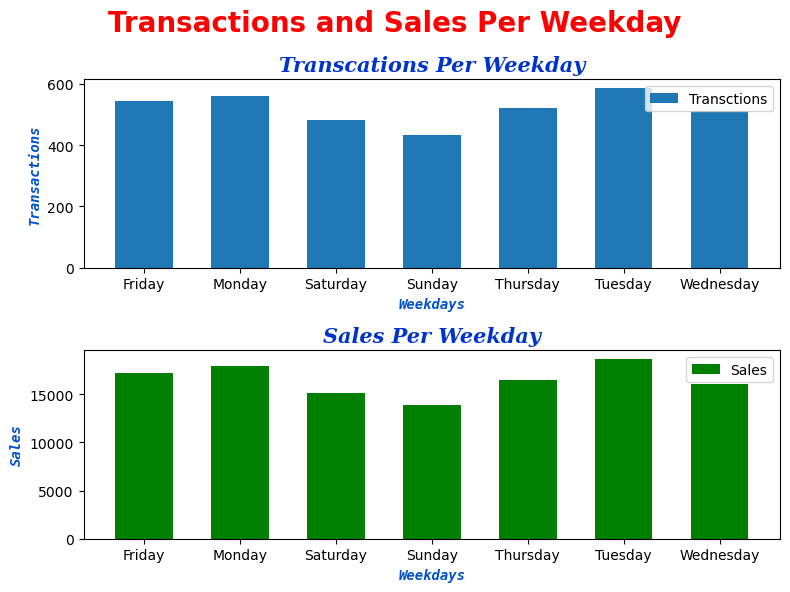

In [139]:
print('Trend of transactions and sales by day of the week (Monday–Sunday)')
sales_by_day = df.groupby('Weekday', observed = True).agg(
    Total_Transactions = ('coffee_name','count'),
    Total_Sales = ('money', 'sum'))
print(sales_by_day)
weekdays = ['Friday','Monday', 'Saturday','Sunday','Thursday','Tuesday','Wednesday']
days = np.arange(1,8,1)
print(days)
fig1, axs1 = plt.subplots(2,1, figsize=(8,6))
axs1[0].bar(weekdays,sales_by_day['Total_Transactions'], label = 'Transctions', width = 0.6)
axs1[0].legend(loc = 1)
labelfont = {'family': 'monospace',
              'style': 'italic',
              'weight': 'bold',
            'size': 10,
            'color': '#0052cc'}
titlefont = {'family': 'serif',
            'style': 'oblique',
            'weight': 'heavy',
            'size': 15,
            'color': '#0033cc'}
axs1[0].set_xlabel('Weekdays', fontdict = labelfont)
axs1[0].set_ylabel('Transactions', fontdict = labelfont)
axs1[0].set_title('Transcations Per Weekday', fontdict = titlefont)
for i,v in enumerate(sales_by_day['Total_Transactions']):
    axs[0].annotate(str(v), (i,v), (i-0.07,v/2), rotation = 90)
axs1[1].bar(weekdays,sales_by_day['Total_Sales'], color = 'g', label = 'Sales',width = 0.6)
axs1[1].legend()
axs1[1].set_xlabel('Weekdays', fontdict = labelfont)
axs1[1].set_ylabel('Sales', fontdict = labelfont)
axs1[1].set_title('Sales Per Weekday', fontdict = titlefont)
fig1.suptitle('Transactions and Sales Per Weekday', color = 'r', weight = 'heavy', size = 20)
for i,v in enumerate(sales_by_day['Total_Sales']):
    axs[1].annotate(str(v), (i,v), (i-0.07,v/2), rotation = 90)
fig1.tight_layout()
fig4.savefig('D:\\Coffee-Store-Sales-Dashboard\\images\\transactions_sales_per_weekday.png', dpi = 300)

Revenue distribution by coffee type
coffee_name
Americano              15062.26
Americano with Milk    25269.12
Cappuccino             18034.14
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Hot Chocolate          10172.46
Latte                  27866.30
Name: money, dtype: float64


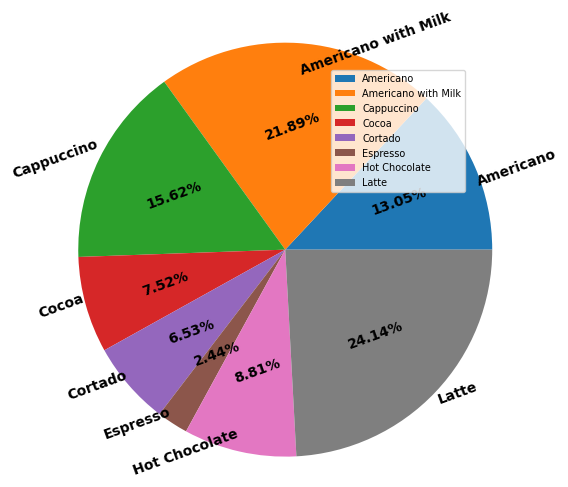

In [141]:
print('Revenue distribution by coffee type')
revenue_by_coffee = df.groupby('coffee_name',observed = True)['money'].sum()
print(revenue_by_coffee)

plt.pie(revenue_by_coffee,autopct = '%0.2f%%', radius = 1.4,labels = ['Americano','Americano with Milk','Cappuccino','Cocoa','Cortado','Espresso','Hot Chocolate','Latte'], labeldistance = 1,textprops={'rotation': 20, 'weight': 'bold'})
plt.legend(loc=1, fontsize = 7)
plt.savefig('D:\\Coffee-Store-Sales-Dashboard\\images\\revenue_distribution_of_coffee.png', dpi = 300)
#coffee_rev_by_weekday = df.groupby(['coffee_name', 'Weekday'], observed = True).agg(
#    Revenue = ('money', 'sum'))
#print('Revenues distribution of coffees by Weekday\n', coffee_rev_by_weekday)

Payment method preference (card vs. cash)
           Total_payments  Total_revenue
cash_type                               
card                 3547      112245.58
cash                   89        3186.00


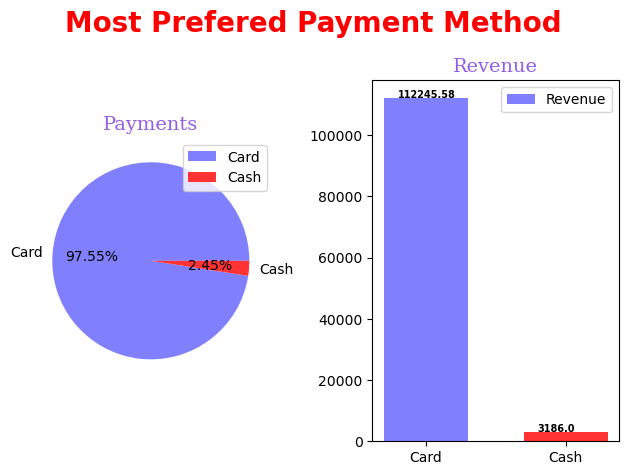

In [135]:
print('Payment method preference (card vs. cash)')
payment_pref = df.groupby('cash_type', observed = True).agg(
    Total_payments = ('cash_type', 'count'),
    Total_revenue = ('money', 'sum'))
print(payment_pref)
fig2, axs2 = plt.subplots(1,2)
axs2[0].pie(payment_pref['Total_payments'],colors = ['#8080ff', '#ff3333'],autopct = '%0.2f%%', labels = ['Card', 'Cash',])
axs2[0].legend()
axs2[0].set_title('Payments', fontdict = titlefont)
axs2[1].bar(['Card','Cash'], payment_pref['Total_revenue'],color = ['#8080ff', '#ff3333'], width = 0.6, label = 'Revenue')
axs2[1].legend(loc=1)
axs2[1].set_title('Revenue', fontdict = titlefont)
for i,v in enumerate(payment_pref['Total_revenue']):
    axs2[1].annotate(str(v),(i,v),(i-0.2, v), size = 7, weight = 'heavy')
fig2.suptitle('Most Prefered Payment Method', color = 'r', size = 20, weight = 'heavy')
fig2.tight_layout()
fig2.savefig('D:\\Coffee-Store-Sales-Dashboard\\images\\most_prefered_payment_method.png', dpi = 300)

In [14]:
print('Average daily transactions and average daily sales')
total_days = df['date'].nunique()
avg_day_transactions = round(df['cash_type'].count() / total_days,2)
print('Average daily transactions: ',avg_day_transactions)
avg_day_sales = round(df['money'].sum() / total_days,2)
print('Average daily sales: ',avg_day_sales)

Average daily transactions and average daily sales
Average daily transactions:  9.54
Average daily sales:  302.97


Peak times of the day: morning, afternoon, evening
             Total_Transcations  Total_sales
Time_of_Day                                 
Afternoon                  1231     39018.04
Morning                    1221     37380.20
Night                      1184     39033.34
Time_of_Day
Afternoon    39018.04
Morning      37380.20
Night        39033.34
Name: Total_sales, dtype: float64


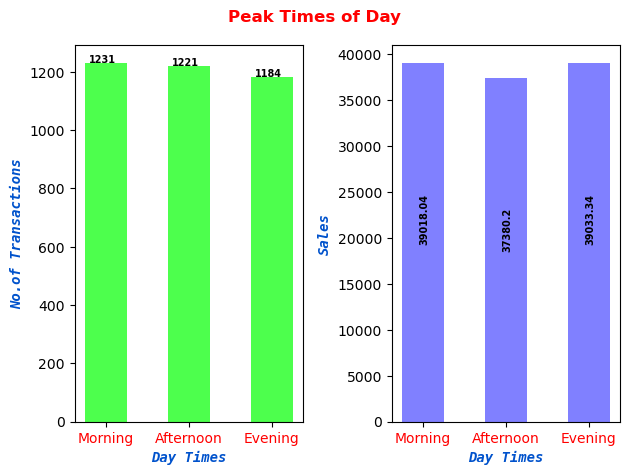

In [134]:
print('Peak times of the day: morning, afternoon, evening')
peak_times_of_day = df.groupby('Time_of_Day', observed = True).agg(
    Total_Transcations = ('cash_type', 'count'),
    Total_sales = ('money', 'sum')
)
print(peak_times_of_day)

times = np.array(df['Time_of_Day'].unique())
print(peak_times_of_day['Total_sales'])
fig3, axs3 = plt.subplots(1,2)
day_times = np.array(['Morning', 'Afternoon', 'Evening'])
axs3[0].bar(day_times,peak_times_of_day['Total_Transcations'],width = 0.5, color = '#4dff4d')
axs3[0].set_xlabel('Day Times', fontdict = labelfont)
axs3[0].set_ylabel('No.of Transactions', fontdict = labelfont)
axs3[0].tick_params(axis='x', labelsize=10, labelcolor='red', labelrotation=0)
for i,v in enumerate(peak_times_of_day['Total_Transcations']):
    axs3[0].annotate(str(v), (i,v), (i-0.2,v), size = 7,  weight = 'heavy')
axs3[1].bar(day_times,peak_times_of_day['Total_sales'],width = 0.5, color= '#8080ff')
axs3[1].set_xlabel('Day Times', fontdict = labelfont)
axs3[1].set_ylabel('Sales', fontdict = labelfont)
axs3[1].set_xticks(ticks = day_times)
axs3[1].tick_params(axis='x', labelsize=10, labelcolor='red')
for i,v in enumerate(peak_times_of_day['Total_sales']):
    axs3[1].annotate(str(v), (i,v), (i-0.04,v/2), size = 7,rotation = 90,  weight = 'heavy')
fig3.suptitle('Peak Times of Day', color = 'r', weight = 'heavy')
fig3.tight_layout()
fig3.savefig('D:\\Coffee-Store-Sales-Dashboard\\images\\Peal_times_of_day.png', dpi = 300)

Analyzing Monthly Sales
                 Monthly_Transactions  Monthly_sales
year Month_name                                     
2024 Apr                          196        6720.56
     Aug                          272        7613.84
     Dec                          259        8237.74
     Jul                          237        6915.94
     Jun                          227        7758.76
     Mar                          206        7050.20
     May                          267        9063.42
     Nov                          259        8590.54
     Oct                          426       13891.16
     Sep                          344        9988.64
2025 Feb                          423       13215.48
     Jan                          201        6398.86
     Mar                          319        9986.44
[ 7050.2   6720.56  9063.42  7758.76  6915.94  7613.84  9988.64 13891.16
  8590.54  8237.74  6398.86 13215.48  9986.44]


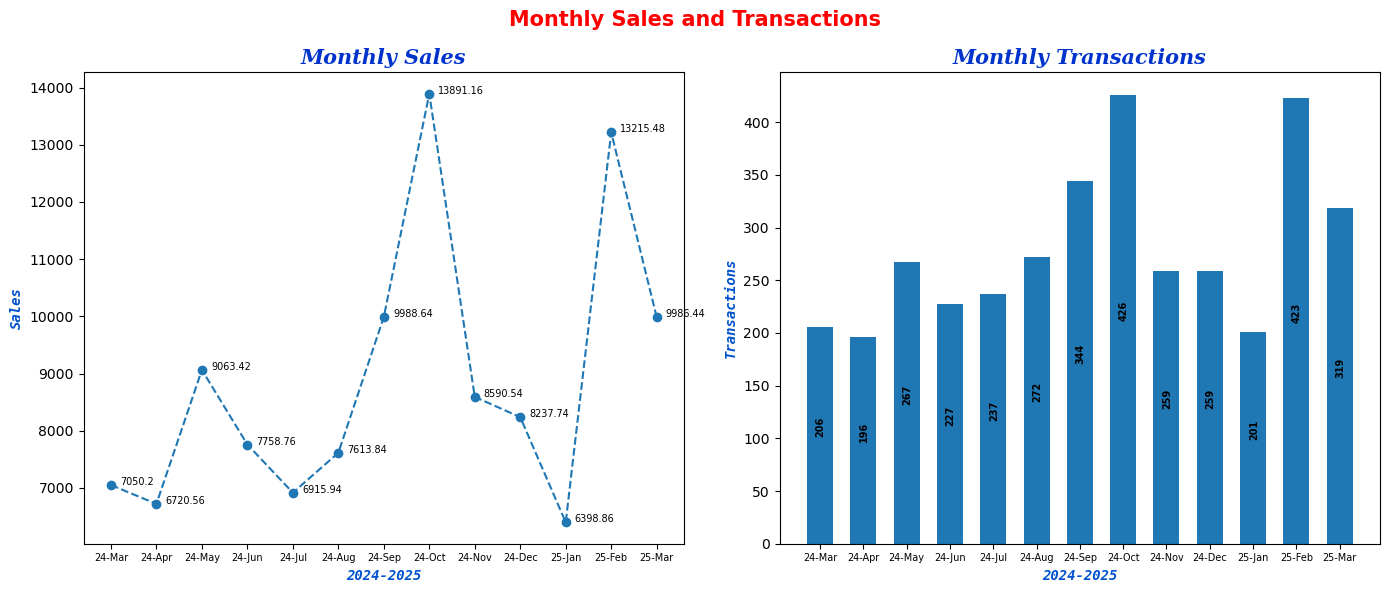

In [140]:
print("Analyzing Monthly Sales")
month_sales = df.groupby(['year', 'Month_name'], observed = True).agg(
    Monthly_Transactions = ('cash_type', 'count'),
    Monthly_sales = ('money', 'sum')
)
print(month_sales)
y1points = np.array([7050.20, 6720.56, 9063.42, 7758.76, 6915.94, 7613.84, 9988.64, 13891.16, 8590.54, 8237.74, 6398.86, 13215.48, 9986.44])
y2points = np.array([ 206, 196, 267, 227, 237, 272, 344, 426, 259, 259, 201, 423, 319])
print(y1points)
xpoints = np.array(['24-Mar', '24-Apr','24-May','24-Jun','24-Jul','24-Aug','24-Sep','24-Oct','24-Nov','24-Dec','25-Jan','25-Feb', '25-Mar'])
fig4,axs4 = plt.subplots(1,2,figsize = (14,6))
axs4[0].plot(xpoints, y1points, 'o--')
axs4[0].tick_params(axis ='x', labelsize = 7)
axs4[0].set_xlabel('2024-2025', fontdict = labelfont)
axs4[0].set_ylabel('Sales', fontdict = labelfont)
axs4[0].set_title('Monthly Sales', fontdict = titlefont)
for i,v in enumerate(y1points):
    axs4[0].annotate(str(round(v,2)),(i,v), (i+0.2,v), size = 7)
axs4[1].bar(xpoints, y2points, width = 0.6)
axs4[1].tick_params(axis ='x', labelsize = 7)
axs4[1].set_xlabel('2024-2025', fontdict = labelfont)
axs4[1].set_ylabel('Transactions', fontdict = labelfont)
axs4[1].set_title('Monthly Transactions', fontdict = titlefont)
for i,v in enumerate(y2points):
    axs4[1].annotate(str(round(v,2)),(i,v), (i-0.1,v/2), size = 7, weight = 'heavy', rotation = 90)
fig4.suptitle('Monthly Sales and Transactions', color = 'r', weight = 'heavy', size = 15)
fig4.tight_layout()
fig4.savefig('D:\\Coffee-Store-Sales-Dashboard\\images\\monthly_coffee_sales.png', dpi = 300)